# ANN - LSTM :  
   to get the **closure price** of stock trending day.  
   - data used : 

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import yfinance as yf
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# get the stock code
# df = web.DataReader('AAPL', data_source='yahoo', start ='2012-01-01', end='2022-02-21')
data = yf.download("SPY", start = '2012-01-01' , end ='2022-05-21')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = data.sort_values('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,127.760002,128.380005,127.430000,127.500000,104.950813,193697900
2012-01-04,127.199997,127.809998,126.709999,127.699997,105.115440,127186500
2012-01-05,127.010002,128.229996,126.430000,128.039993,105.395325,173895000
2012-01-06,128.199997,128.220001,127.290001,127.709999,105.123688,148050000
2012-01-09,128.000000,128.179993,127.410004,128.020004,105.378876,99530200
...,...,...,...,...,...,...
2022-05-16,399.980011,403.970001,397.600006,400.089996,400.089996,78622400
2022-05-17,406.529999,408.570007,402.579987,408.320007,408.320007,83029700
2022-05-18,403.500000,403.799988,390.549988,391.859985,391.859985,117674500


In [ ]:
# Get the shape
df.shape

(2614, 6)

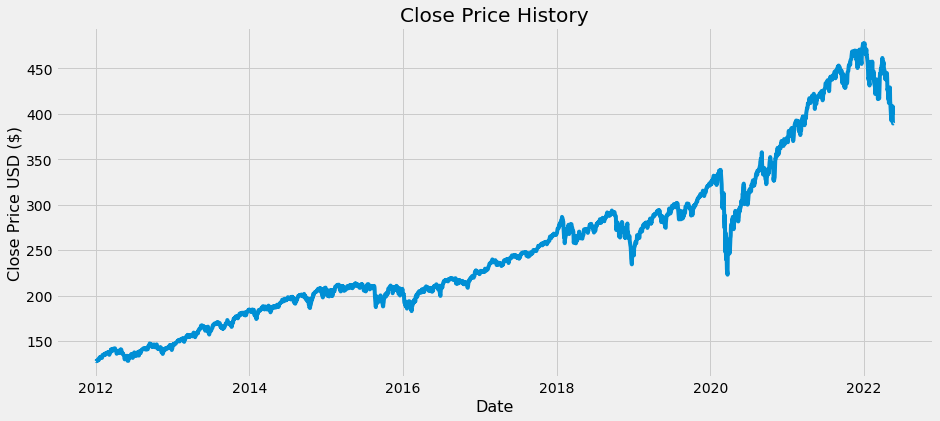

In [ ]:
# Visualise the closing price history
plt.figure(figsize=(14,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize =16)
plt.show()

In [ ]:
# create a new df with only close column 
data = df.filter(['Close'])
# convert the df to a numpy array
dataset = data.values
# get the no. of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)

training_data_len

2092

In [ ]:
# scale the data - preprocessing
scaler = MinMaxScaler(feature_range=(0,1))  # 0-1inclusive
scaled_Data = scaler.fit_transform(dataset)

scaled_Data

array([[0.00000000e+00],
       [5.71077220e-04],
       [1.54191285e-03],
       ...,
       [7.54861345e-01],
       [7.48008332e-01],
       [7.48493793e-01]])

In [ ]:
# CReate the training dataset - create the scaled dataset

train_data = scaled_Data[0:training_data_len, :]
# split the data into x_train and y_train datasets
x_train =[]
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.        , 0.00057108, 0.00154191, 0.00059964, 0.00148484,
       0.00465436, 0.00485422, 0.0057394 , 0.00382627, 0.00525398,
       0.00933727, 0.01130752, 0.01270665, 0.01173582, 0.01130752,
       0.01444847, 0.0125068 , 0.01233548, 0.0110505 , 0.01090776,
       0.01419149, 0.0147911 , 0.02010221, 0.01984523, 0.02081606,
       0.02195826, 0.02244368, 0.01958825, 0.02244368, 0.02195826,
       0.02015933, 0.02441393, 0.02544189, 0.02561321, 0.02435681,
       0.02607009, 0.02692668, 0.02758346, 0.02872562, 0.0271837 ,
       0.02921103, 0.02801176, 0.02641272, 0.02070187, 0.02338598,
       0.02724078, 0.0287542 , 0.02878274, 0.03586419, 0.03543589,
       0.03774878, 0.03654951, 0.03812   , 0.03694927, 0.03629253,
       0.03340852, 0.03469345, 0.04029011, 0.03903372, 0.03703493])]
[0.0363496074873465]

[array([0.        , 0.00057108, 0.00154191, 0.00059964, 0.00148484,
       0.00465436, 0.00485422, 0.0057394 , 0.00382627, 0.00525398,
       0.00933727, 0.01130752, 0.012

In [ ]:
# convert the x_train and y_train to numpy array
x_train , y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1 ))
x_train.shape

(2032, 60, 1)

- Build the LSTM model

In [ ]:
# lstm build 
model = Sequential()
model.add(LSTM(50, return_sequences =True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences =False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model
model.fit(x_train, y_train , batch_size = 1, epochs = 1)

2032/2032 [==============================] - 81s 38ms/step - loss: 7.5381e-04


In [ ]:
# create testing dataset  - a new arrray = contaiing scaled values from index to 
test_data = scaled_Data[training_data_len - 60: , :] 

# create datasets x_test & y_test
x_test =[]
y_test = dataset[training_data_len:,:]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
# convert the data to a numpy array to use in lstm modell
x_test = np.array(x_test)
# reshape the data - lstm expecting a 3d shape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# get the root mean square error (RMSE) 
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

5.374968137777628

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


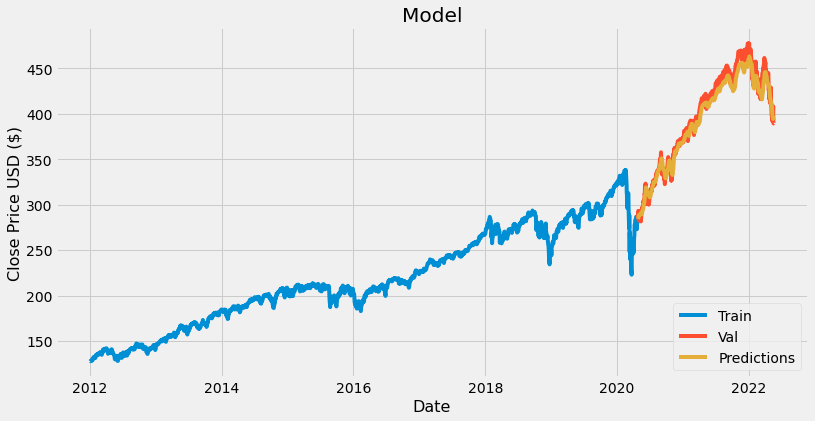

In [ ]:
# plot the data 
train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize =(12,6))
plt.title('Model')
plt.xlabel('Date', fontsize =16)
plt.ylabel('Close Price USD ($)', fontsize = 16)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc = 'lower right')
plt.show()


In [ ]:
# show actual & predicted
valid

,Close,Predictions
Date,,
2020-04-28,285.730011,284.083405
2020-04-29,293.209991,284.945557
2020-04-30,290.480011,286.634125
2020-05-01,282.790009,288.288269
2020-05-04,283.570007,288.915070
...,...,...
2022-05-16,400.089996,395.772552
2022-05-17,408.320007,394.631866
2022-05-18,391.859985,395.146515


In [ ]:
valid.loc['2022-05-19'].at['Close']

389.4599914550781

In [ ]:
# Get the quote
spy_quote = yf.download("SPY", start = '2012-01-01' , end ='2022-05-16')
new_df = spy_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[395.77255]]


In [ ]:
spy_quote_orig = yf.download("SPY", start = '2022-05-17' , end ='2022-05-18')
print(spy_quote_orig['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2022-05-17    408.320007
Name: Close, dtype: float64


In [ ]:
tickers = ["SPY"] #Subtitute for the tickers you want
df =yf.download(tickers,  start = "2022-05-17" , end = "2022-05-18")
df.Close

[*********************100%***********************]  1 of 1 completed


Date
2022-05-17    408.320007
Name: Close, dtype: float64

In [ ]:
error = ((df.loc["2022-05-17"].Close) - pred_price)
error

array([[12.547455]], dtype=float32)

Algorithm:
- scrap data with date and time
- preprocessing : check the updated preprocessing of HMM LSTM
- add columns of up , down, flat - numeric values
- divide into training and test sets
- train algorithm 
- prediction and actual column
- calculate accuracy : if prediction == acuuracy then (true prediction/ all predictions) 
- make a table with columns : Date, time, trend, trend value, accuracy 
- to get trend value of a particular date and time, extract it from the table of prediction and actual column   
or extract it from the first scraped data table